In [11]:
library(ggplot2)

In [12]:
dataFull <- read.csv("mdpv4Traj.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]
print("rows")
nrow(dataFull)
print("cols")
ncol(dataFull)
print("unique alpha")
sort(unique(dataFull$alpha))
head(data, 2)

[1] "rows"


[1] 95874

[1] "cols"


[1] 23

[1] "unique alpha"


[1] 0.001 0.002 0.004 0.005 0.008 0.010 0.016 0.020 0.032 0.040 0.050 0.080
[13] 0.100 0.160 0.200 0.320 0.400 0.500 0.800 1.000

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,episodes,endScoreBell,endScoreRand,aggs,backups,endScoreStochBell,endScore,diffs,avgRewArr,epsToBackup
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2208,10,0.001,0.6,1,1,-1,True,3701,0,141400,⋯,1400,3899.844,1232.687,0,141400,2237.686,3935.034,3.705596,0.00000,0
2209,10,0.001,0.6,1,1,-1,True,3701,0,141400,⋯,1400,3899.844,1232.687,0,141400,2237.686,3935.034,3.583829,11.77784,1010


[1] 6

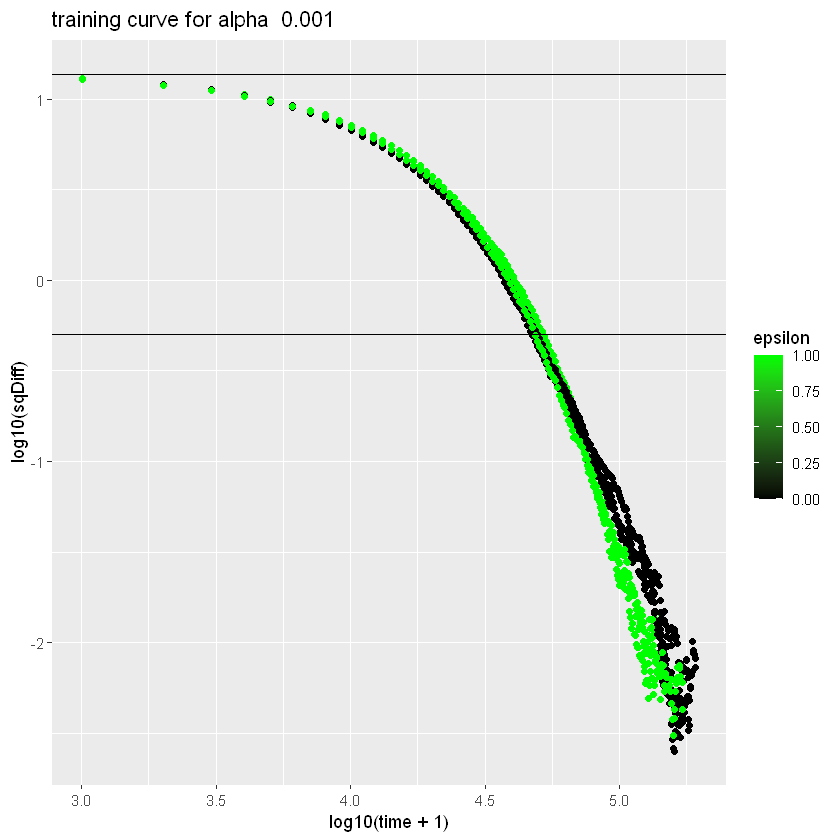

In [15]:
a = 0.001
title <- paste("training curve for alpha ", a)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == 1,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time + 1), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + geom_hline(yintercept=log10(0.5))
p <- p + geom_hline(yintercept=log10(13.731440581206959)) # starting distance squared
p

# ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")

[1] 6

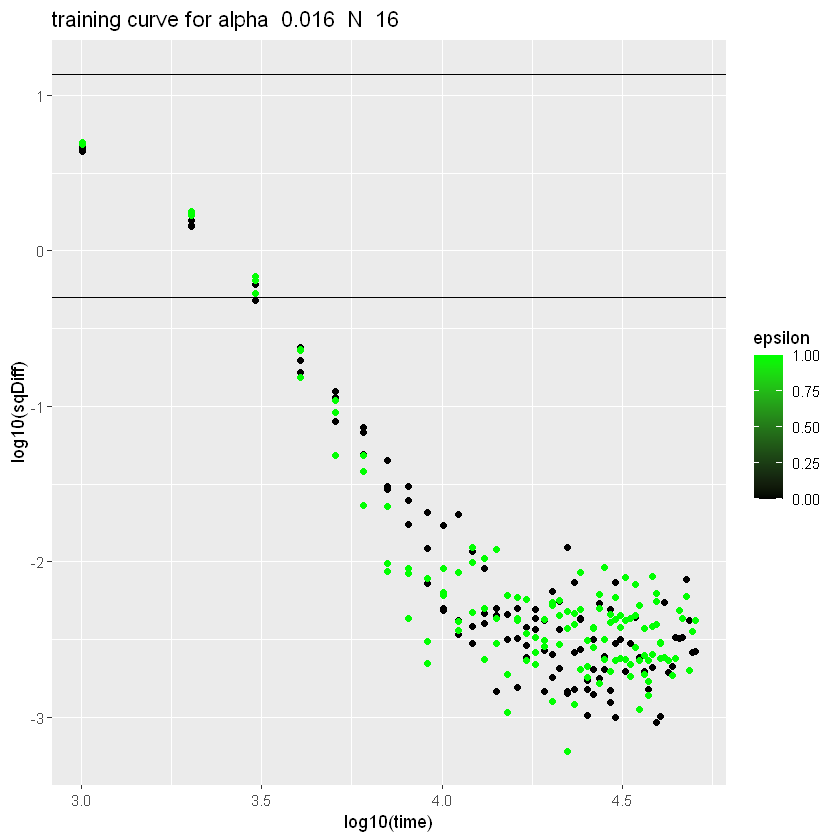

In [16]:
a = 0.001
N = 16
a = a * N
title <- paste("training curve for alpha ", a, " N ", N)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + geom_hline(yintercept=log10(0.5))
p <- p + geom_hline(yintercept=log10(13.731440581206959)) # starting distance squared
p

[1] 6

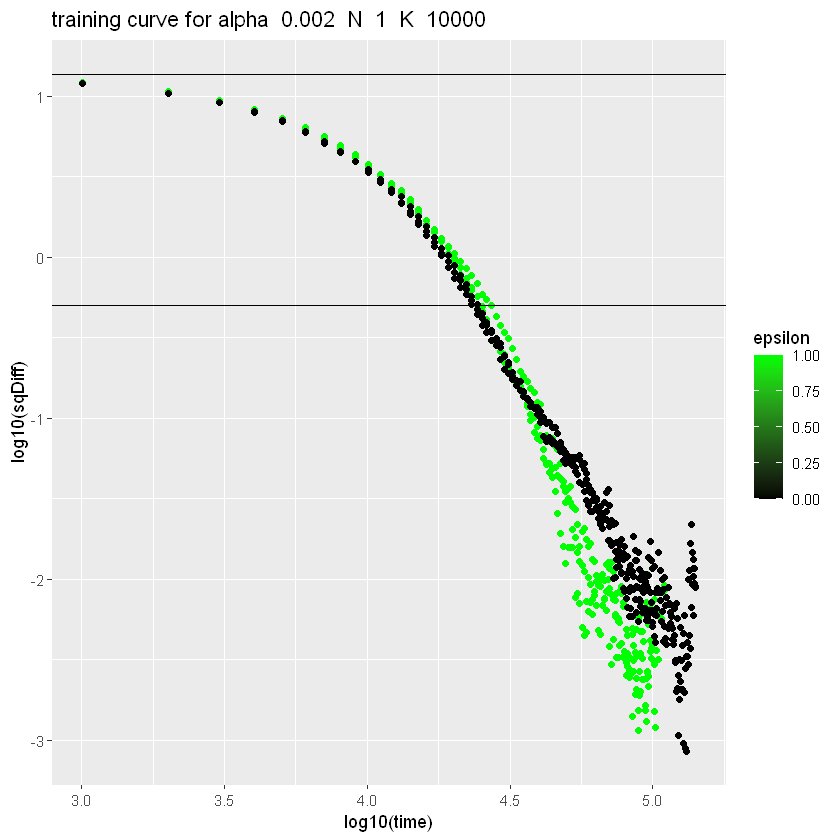

In [19]:
a = 0.002
N = 1
K = 10000
# a = a * N
title <- paste("training curve for alpha ", a, " N ", N, " K ", K)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + geom_hline(yintercept=log10(0.5))
p <- p + geom_hline(yintercept=log10(13.731440581206959)) # starting distance squared
p

In [ ]:
as = list(0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1)
Ns = list(2, 4, 8, 16)
Ks = list(1, 10, 100, 1000, 10000)

for (a in as){
    for (N in Ns){
        for (K in Ks) {
# a = a * N
            title <- paste("training curve for alpha ", a, " N ", N, " K ", K)
            data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
            nrow(data[data$epsToBackup == 1010,])
            sqDiff = data$diffs ** 2

            time <- data$epsToBackup
            p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
            p <- p + ggtitle(title)
            p <- p + geom_point(aes(colour = epsilon))
            p <- p + scale_color_gradientn(colors = c("black", "green"))
            p <- p + geom_hline(yintercept=log10(0.5))
            ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")
            
        }
    }
}

for (at in as){
    for (N in Ns){
        a = at * N
        if (a >= 1 | a %in% as)
            next
        
        for (K in Ks) {
# a = a * N
            title <- paste("training curve for alpha ", a, " N ", N, " K ", K)
            data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
            nrow(data[data$epsToBackup == 1010,])
            sqDiff = data$diffs ** 2

            time <- data$epsToBackup
            p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
            p <- p + ggtitle(title)
            p <- p + geom_point(aes(colour = epsilon))
            p <- p + scale_color_gradientn(colors = c("black", "green"))
            p <- p + geom_hline(yintercept=log10(0.5))
            ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")
            
        }
    }
}